## Customer Segmentation Analysis

#### Project Overview
The goal of this project is to segment customers based on purchasing behavior and demographics using clustering techniques. These segments help the business design targeted marketing campaigns, improve customer retention, and maximize revenue.

#### Import Libarires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt

#### Load the Dataset

In [2]:
data = pd.read_csv('marketing_data.csv')

In [3]:
# previewing the dataset

data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
data.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### Data Exploration & Cleaning

In [6]:
data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [11]:
data.duplicated().sum()

np.int64(184)

In [12]:
data.shape

(2205, 39)

In [15]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [16]:
print("Cleaned shape:", data.shape)

Cleaned shape: (2021, 39)


#### Descriptive Statistics

In [17]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [19]:
# Average purchase value
avg_purchase_value = data["MntTotal"].mean()
print("Average Purchase Value:", round(avg_purchase_value, 2))

Average Purchase Value: 563.79


In [21]:
# Purchase Frequency
data["TotalPurchases"] = (
    data["NumWebPurchases"] +
    data["NumCatalogPurchases"] +
    data["NumStorePurchases"]
)

avg_purchase_frequency = data["TotalPurchases"].mean()
print("Average Purchase Frequency:", round(avg_purchase_frequency, 2))

Average Purchase Frequency: 12.57


In [23]:
# Total Revenue
total_revenue = data["MntTotal"].sum()
print("Total Revenue:", round(total_revenue, 2))

Total Revenue: 1139418


In [24]:
# Average Revenue per Customer
avg_revenue_per_customer = data["MntTotal"].mean()
print("Average Revenue per Customer:", round(avg_revenue_per_customer, 2))

Average Revenue per Customer: 563.79


In [25]:
# Product-wise Average Spending
product_columns = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

product_avg = data[product_columns].mean()
product_avg

MntWines            306.492331
MntFruits            26.364671
MntMeatProducts     166.059871
MntFishProducts      37.603662
MntSweetProducts     27.268679
MntGoldProds         43.921821
dtype: float64

In [26]:
# Summary Metrics Table (Report-ready)
summary = pd.DataFrame({
    "Metric": [
        "Average Purchase Value",
        "Average Purchase Frequency",
        "Total Revenue"
    ],
    "Value": [
        avg_purchase_value,
        avg_purchase_frequency,
        total_revenue
    ]
})

summary

,Metric,Value
0,Average Purchase Value,5.637892e+02
1,Average Purchase Frequency,1.256754e+01
2,Total Revenue,1.139418e+06


##### Create Useful Metrics

In [27]:
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data['Total_Purchases'] = (
    data['NumWebPurchases'] +
    data['NumStorePurchases'] +
    data['NumCatalogPurchases']
)

#### Customer Segmentation (Clustering)

##### Feature Selection

We focus on behavioral variables, not IDs or labels.

In [28]:
features = data[['Income', 'Recency', 'Total_Purchases', 'MntTotal']]

#### Feature Scaling (IMPORTANT)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


#### Finding Optimal K (Elbow Method)

C:\Users\OPTIMUSs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\OPTIMUSs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\OPTIMUSs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\OPTIMUSs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

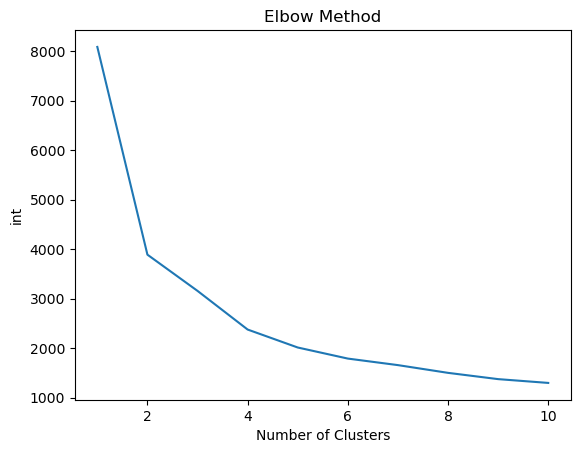

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

int = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    int.append(kmeans.inertia_)

plt.plot(range(1,11), inc)
plt.xlabel("Number of Clusters")
plt.ylabel("int")
plt.title("Elbow Method")
plt.show()


#### Applying K-Means Clustering

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Customer_Segment'] = kmeans.fit_predict(scaled_features)


C:\Users\OPTIMUSs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


#### Segment Analysis

In [35]:
segment_summary = data.groupby('Customer_Segment').mean()
segment_summary


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalPurchases,Total_Children,Total_Purchases
Customer_Segment,,,,,,,,,,,,,,,,,,,,,
0,36248.817360,0.750452,0.524412,73.077758,60.643761,6.566004,31.860759,9.520796,7.224231,20.560579,...,0.041591,0.506329,0.164557,0.184448,115.815552,95.254973,0.083183,6.831826,1.274864,6.831826
1,71136.757075,0.103774,0.466981,22.764151,600.103774,53.573113,340.490566,73.507075,52.403302,70.599057,...,0.000000,0.507075,0.167453,0.224057,1120.077830,1049.478774,0.584906,19.582547,0.570755,19.582547
2,36515.197080,0.697080,0.512774,23.016423,75.518248,6.622263,32.189781,9.680657,5.859489,23.023723,...,0.045620,0.481752,0.173358,0.202555,129.870438,106.846715,0.118613,7.187956,1.209854,7.187956
3,69036.372984,0.110887,0.526210,72.804435,584.792339,46.991935,314.475806,69.072581,51.784274,70.252016,...,0.002016,0.516129,0.157258,0.264113,1067.116935,996.864919,0.508065,18.909274,0.637097,18.909274


#### Segment Profile

In [38]:
segment_profile = data.groupby("Customer_Segment").mean()[[
    "Income",
    "Recency",
    "MntTotal",
    "TotalPurchases"
]]

segment_profile

,Income,Recency,MntTotal,TotalPurchases
Customer_Segment,,,,
0,36248.817360,73.077758,115.815552,6.831826
1,71136.757075,22.764151,1120.077830,19.582547
2,36515.197080,23.016423,129.870438,7.187956
3,69036.372984,72.804435,1067.116935,18.909274


### Visualization of Customer Segments

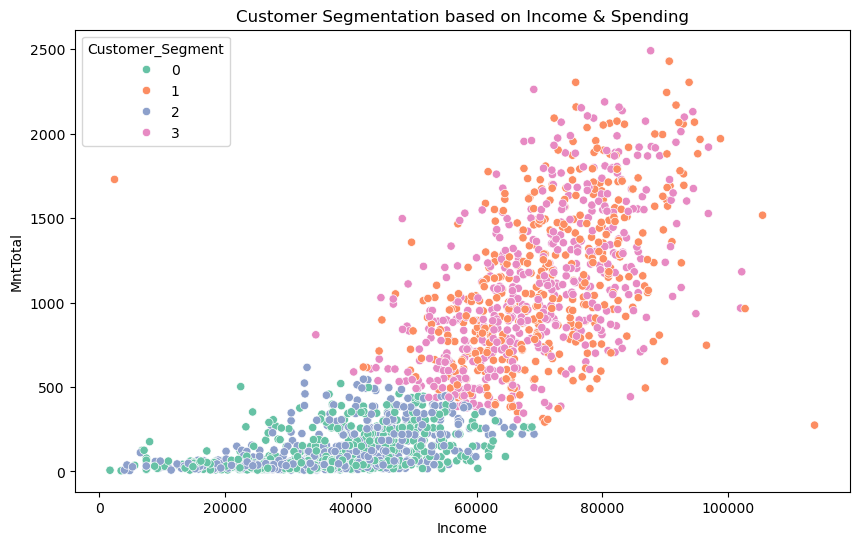

In [40]:


plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Income',
    y='MntTotal',
    hue='Customer_Segment',
    data=data,
    palette='Set2'
)
plt.title("Customer Segmentation based on Income & Spending")
plt.show()


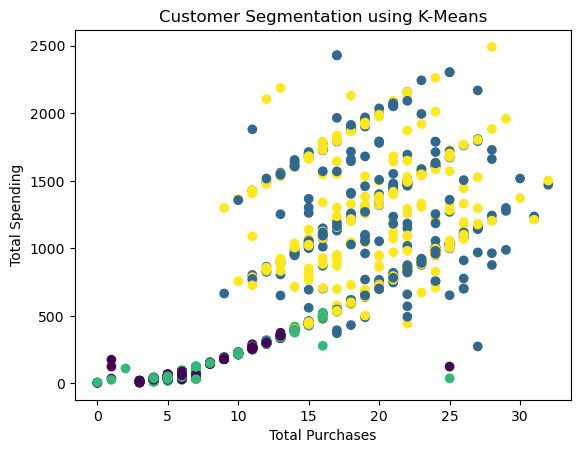

In [42]:
plt.scatter(
    data["TotalPurchases"],
    data["MntTotal"],
    c=data["Customer_Segment"]
)
plt.xlabel("Total Purchases")
plt.ylabel("Total Spending")
plt.title("Customer Segmentation using K-Means")
plt.show()

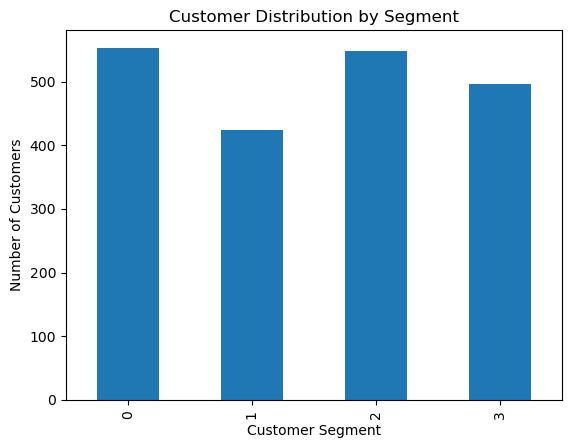

In [44]:
segment_counts = data["Customer_Segment"].value_counts().sort_index()

segment_counts.plot(kind="bar")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Segment")
plt.show()

#### Typical Segments Identified

| Segment | Description                                                 |
| ------- | ----------------------------------------------------------- |
| **0**   | High income, high spending (Premium Customers)              |
| **1**   | Low income, low spending (Low Value Customers)              |
| **2**   | Frequent buyers, moderate spending (Loyal Customers)        |
| **3**   | High income but low engagement (Potential Growth Customers) |


#### Segment-wise Customer Count (Bar Chart)

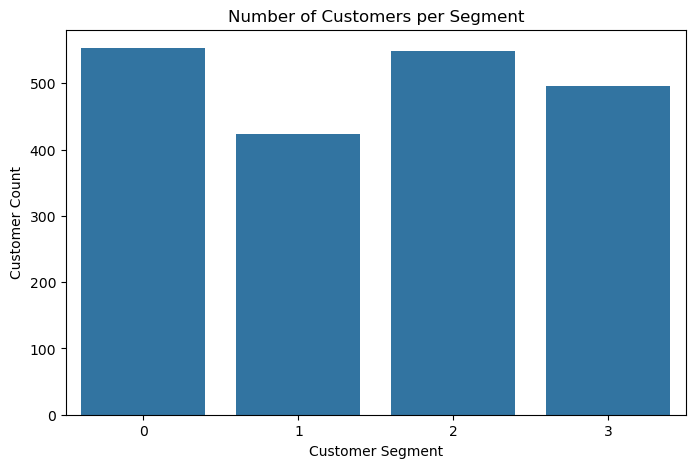

In [45]:


plt.figure(figsize=(8,5))
sns.countplot(x='Customer_Segment', data=data)
plt.title('Number of Customers per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Count')
plt.show()


#### Segment-wise Average Spending (Bar Chart)

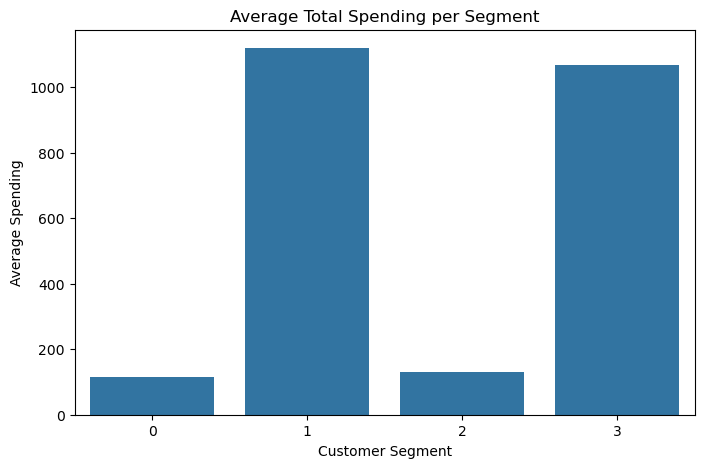

In [47]:
segment_spend = data.groupby('Customer_Segment')['MntTotal'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Segment', y='MntTotal', data=segment_spend)
plt.title('Average Total Spending per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending')
plt.show()


#### Income vs Recency (Scatter Plot)

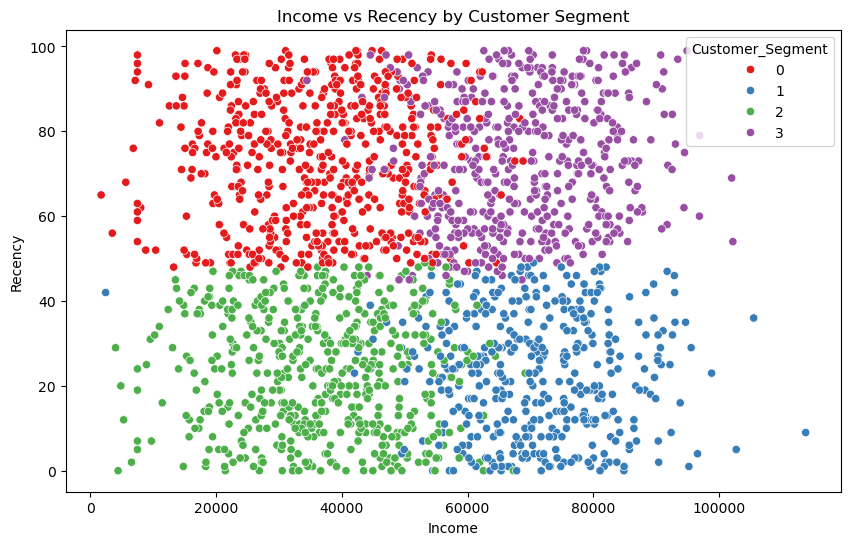

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Income',
    y='Recency',
    hue='Customer_Segment',
    data=data,
    palette='Set1'
)
plt.title('Income vs Recency by Customer Segment')
plt.show()


#### Purchase Channel Distribution (Stacked Bar Chart)

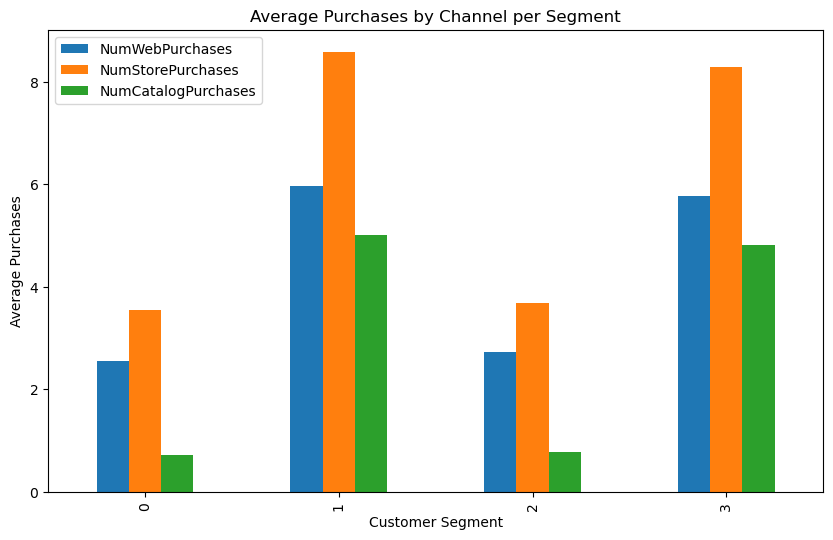

In [51]:
channel_data = data.groupby('Customer_Segment')[
    ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
].mean()

channel_data.plot(kind='bar', figsize=(10,6))
plt.title('Average Purchases by Channel per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Purchases')
plt.show()


#### Spending Category Distribution (Heatmap 🔥)

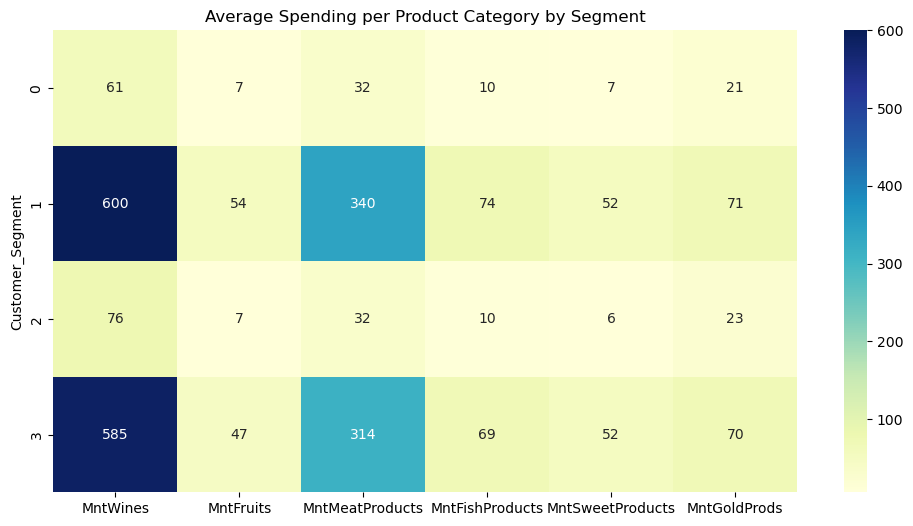

In [53]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

heatmap_data = data.groupby('Customer_Segment')[spend_cols].mean()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Spending per Product Category by Segment')
plt.show()


#### Boxplot – Income Distribution by Segment

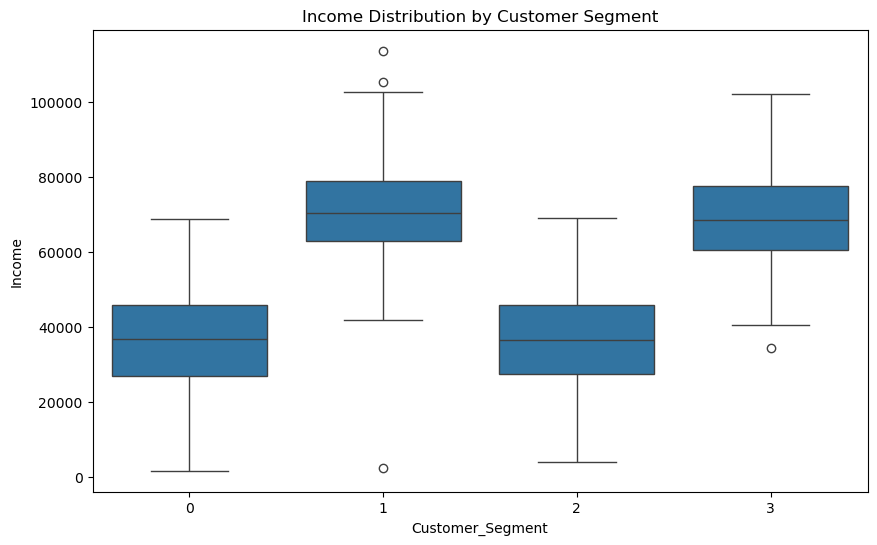

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Customer_Segment', y='Income', data=data)
plt.title('Income Distribution by Customer Segment')
plt.show()


### Segment-wise Insights & Recommendations

#### Segment 0 – Premium / High-Value Customers
##### Insights

High Income

Highest Total Spending (MntTotal)

Frequent purchases across multiple channels

Recency low → recently active customers

#### Segment 1 – Low-Value / Price-Sensitive Customers
#####  Insights

Low income

Low purchase frequency

Lowest spending

Long recency → inactive customers

#### Segment 2 – Loyal / Frequent Buyers
##### Insights

Moderate income

High purchase frequency

Medium-high spending

Regular engagement

#### Segment 3 – High Income but Low Engagement (Potential Growth)
##### Insights

High income

Low to medium spending

High recency → not buying recently

Under-utilized customers

### Summary Table

| Segment | Type                | Strategy              |
| ------- | ------------------- | --------------------- |
| 0       | Premium Customers   | Retain & Reward       |
| 1       | Low-Value Customers | Discount & Reactivate |
| 2       | Loyal Customers     | Upsell & Personalize  |
| 3       | Potential Customers | Re-engage & Convert   |


### Description

##### Customer Segmentation Analysis using K-Means
Performed clustering on e-commerce customer data to identify distinct customer groups based on income, spending, and purchasing behavior. Applied data cleaning, feature scaling, and visualization techniques to generate actionable business insights for targeted marketing strategies

### Completed